In [4]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import pandas as pd
import os
from keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns

%run ../preproc/data_preproc.ipynb
%matplotlib inline

(2, 24, 1) (2, 1)


### Prepare data

In [5]:
input_dir = '../data'
input_files = [f for f in os.listdir(input_dir) if '.xlsx' in f]
input_files

['201711010800.xlsx',
 '201801010800.xlsx',
 '201802010800.xlsx',
 '201712010800.xlsx']

In [6]:
data = PreProc(input_dir, '蒸気')
data.input_dir
data.set_train_test_files('201801010800.xlsx', '201802010800.xlsx')
df=data.get_df(data.train_file)

y_train = data.strip(data.get_target(data.train_file, '需要蒸気'))
y_test = data.strip(data.get_target(data.test_file, '需要蒸気'))

### Network design

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 138, 32)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 7,489
Trainable params: 7,489
Non-trainable params: 0
_________________________________________________________________


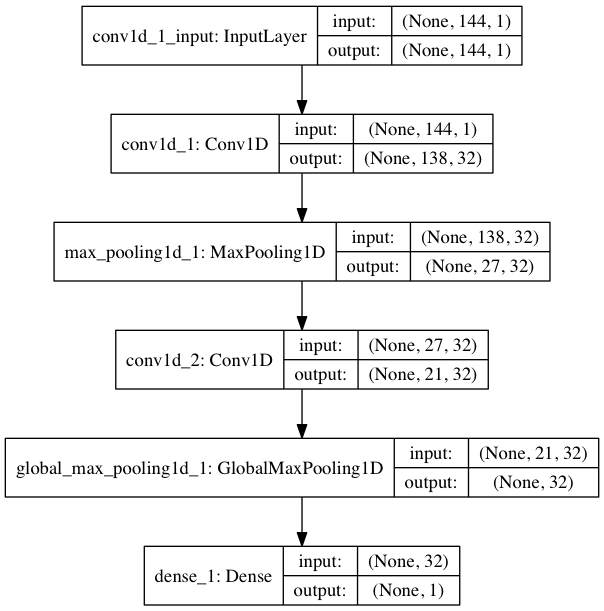

In [7]:
'''
Be careful of the flow of tensor shapes
    https://stackoverflow.com/questions/42392798/error-during-playing-with-keras-example-pretrained-word-embeddings
'''
len_x = 144 # feature length, using 144 hours (one week) time series as features to predict the next y
batch_size = 32

model=Sequential()
model.add(layers.Conv1D(32, 7, activation='relu', input_shape=(len_x, 1)))
model.add(layers.MaxPool1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

plot_model(model, show_shapes=True, to_file='simple_1d_conv.png')

from IPython.display import Image
Image("simple_1d_conv.png")

### Training

In [8]:
steps = (len(y_train) - len_x) // batch_size

model.compile(optimizer=RMSprop(lr=1e-4), loss='mae', metrics=['acc'])
history = model.fit_generator(generator=data.generator_1d(y_train, len_x, batch_size),
                              steps_per_epoch=steps, shuffle=False, verbose=1,
                              epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 28ms/step - loss: 14.3810 - acc: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 0s 9ms/step - loss: 6.0168 - acc: 0.0000e+00
Epoch 3/200
18/18 [==============================] - 0s 10ms/step - loss: 12.0454 - acc: 0.0000e+00
Epoch 4/200
18/18 [==============================] - 0s 11ms/step - loss: 10.0925 - acc: 0.0000e+00
Epoch 5/200
18/18 [==============================] - 0s 10ms/step - loss: 5.3124 - acc: 0.0000e+00
Epoch 6/200
18/18 [==============================] - 0s 9ms/step - loss: 2.2700 - acc: 0.0000e+00
Epoch 7/200
18/18 [==============================] - 0s 10ms/step - loss: 1.7177 - acc: 0.0000e+00
Epoch 8/200
18/18 [==============================] - 0s 10ms/step - loss: 1.5305 - acc: 0.0000e+00
Epoch 9/200
18/18 [==============================] - 0s 10ms/step - loss: 1.6365 - acc: 0.0000e+00
Epoch 10/200
18/18 [==============================] - 0s 11ms/step - loss: 2.0573 - acc: 0.0000e+00
Epoch 11

18/18 [==============================] - 0s 7ms/step - loss: 1.4091 - acc: 0.0000e+00
Epoch 84/200
18/18 [==============================] - 0s 7ms/step - loss: 1.3802 - acc: 0.0000e+00
Epoch 85/200
18/18 [==============================] - 0s 8ms/step - loss: 2.0985 - acc: 0.0000e+00
Epoch 86/200
18/18 [==============================] - 0s 7ms/step - loss: 1.8296 - acc: 0.0000e+00
Epoch 87/200
18/18 [==============================] - 0s 7ms/step - loss: 1.4824 - acc: 0.0000e+00
Epoch 88/200
18/18 [==============================] - 0s 7ms/step - loss: 1.8176 - acc: 0.0000e+00
Epoch 89/200
18/18 [==============================] - 0s 9ms/step - loss: 3.3452 - acc: 0.0000e+00
Epoch 90/200
18/18 [==============================] - 0s 7ms/step - loss: 9.1707 - acc: 0.0000e+00
Epoch 91/200
18/18 [==============================] - 0s 6ms/step - loss: 5.8164 - acc: 0.0000e+00
Epoch 92/200
18/18 [==============================] - 0s 7ms/step - loss: 0.3898 - acc: 0.0087
Epoch 93/200
18/18 [=======

18/18 [==============================] - 0s 6ms/step - loss: 1.6160 - acc: 0.0000e+00
Epoch 166/200
18/18 [==============================] - 0s 7ms/step - loss: 1.3796 - acc: 0.0000e+00
Epoch 167/200
18/18 [==============================] - 0s 6ms/step - loss: 1.4720 - acc: 0.0000e+00
Epoch 168/200
18/18 [==============================] - 0s 7ms/step - loss: 1.8552 - acc: 0.0000e+00
Epoch 169/200
18/18 [==============================] - 0s 6ms/step - loss: 2.2022 - acc: 0.0000e+00
Epoch 170/200
18/18 [==============================] - 0s 6ms/step - loss: 2.3570 - acc: 0.0000e+00
Epoch 171/200
18/18 [==============================] - 0s 6ms/step - loss: 1.3522 - acc: 0.0000e+00
Epoch 172/200
18/18 [==============================] - 0s 12ms/step - loss: 1.2815 - acc: 0.0000e+00
Epoch 173/200
18/18 [==============================] - 0s 13ms/step - loss: 1.7681 - acc: 0.0000e+00
Epoch 174/200
18/18 [==============================] - 0s 12ms/step - loss: 1.5839 - acc: 0.0174
Epoch 175/200
1

### Predicting

In [9]:
steps = (len(y_test) - len_x) // batch_size

preds = model.predict_generator(generator=data.generator_1d(y_test, len_x, batch_size), steps=steps)

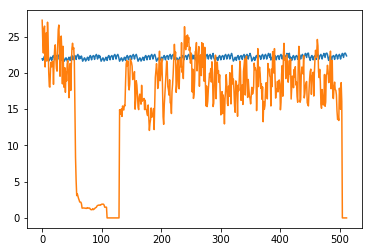

In [10]:
plt.plot(preds)
plt.plot(y_test[-512:])